In [2]:
book_name = "mlbook.pdf"

In [3]:
!pip install PyMuPDF

In [4]:
import fitz
from tqdm.auto import tqdm

def convert_text(text:str)->str:
  convert_t = text.replace("\n"," ").strip()
  return convert_t

def open_and_read(pdf_path:str)->list[dict]:
  doc = fitz.open(pdf_path)
  pages_and_texts = []
  for page_number, page in tqdm(enumerate(doc)):
    text = page.get_text()
    text = convert_text(text)
    pages_and_texts.append({"page_number": page_number - 12,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,
                                "text": text})
  return pages_and_texts

pages_and_text = open_and_read(book_name)
pages_and_text[0:2]

0it [00:00, ?it/s]

[{'page_number': -12,
  'page_char_count': 103,
  'page_word_count': 9,
  'page_sentence_count_raw': 1,
  'page_token_count': 25.75,
  'text': '\x01\x02\x03\x04\x05\x06\x07\x01\x02\x08\t \x0b\x05\x07\x0c\x05\x02\x06\x0b \x0b\r\x07 \x0e\x0f\r\x10\x06 \x04\t\x11\x03 \x01\x02\x03\x04\x05\x06\x07\x08\t \x05\x0b\t\x0c\r\x07\x0e\t\x0f\x05\x08\x10\t\x11\x12\x13\t \x14\x15\x16\x17\x07\x15\x07\x12\x18\t\x0c\r\x07\x15\t\x19\x08\x05\x15\t\x1a\x04\x08\x11\x18\x04\r \x01\x02\x03\x04\x05\x06\x07\x08\x04\t\x05'},
 {'page_number': -11,
  'page_char_count': 885,
  'page_word_count': 140,
  'page_sentence_count_raw': 8,
  'page_token_count': 221.25,
  'text': 'i Disclaimer The information contained within this eBook is strictly for educational purposes. If you wish to apply ideas contained in this eBook, you are taking full responsibility for your actions. The author has made every eﬀort to ensure the accuracy of the information within this book was correct at time of publication. The author does not as

In [5]:
import random

random.sample(pages_and_text , k = 3)

[{'page_number': 59,
  'page_char_count': 2441,
  'page_word_count': 431,
  'page_sentence_count_raw': 22,
  'page_token_count': 610.25,
  'text': '15.2. Representation of LDA Models 63 15.2 Representation of LDA Models The representation of LDA is pretty straight forward. It consists of statistical properties of your data, calculated for each class. For a single input variable (x) this is the mean and the variance of the variable for each class. For multiple variables, the same properties calculated over the multivariate Gaussian, namely the means and the covariance matrix (this is a multi-dimensional generalization of variance). These statistical properties are estimated from your data and plug into the LDA equation to make predictions. These are the model values that you would save to ﬁle for your model. Let’s look at how these parameters are estimated. 15.3 Learning LDA Models LDA makes some simplifying assumptions about your data \x88 That your data is Gaussian, that each variable

In [6]:
import pandas as pd

pdf_data = pd.DataFrame(pages_and_text)

In [7]:
pdf_data.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-12,103,9,1,25.75,\t   \r \r \t ...
1,-11,885,140,8,221.25,i Disclaimer The information contained within ...
2,-10,1897,701,567,474.25,Contents Copyright i Preface iii I Introductio...
3,-9,3321,1239,1039,830.25,"iii 5 Supervised, Unsupervised and Semi-Superv..."
4,-8,3524,1297,1089,881.00,iv 10.7 Preparing Data For Linear Regression ....


In [8]:
pdf_data.describe()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,68.500000,1708.179012,309.932099,47.098765,427.044753
std,46.909487,759.429010,197.271076,168.671102,189.857252
min,-12.000000,20.000000,4.000000,1.000000,5.000000
25%,28.250000,1268.250000,211.250000,11.000000,317.062500
50%,68.500000,1693.500000,288.500000,16.000000,423.375000
75%,108.750000,2222.000000,371.000000,20.750000,555.500000
max,149.000000,3524.000000,1297.000000,1089.000000,881.000000


In [9]:
pip install -U pip setuptools wheel

In [10]:
pip install -U spacy

In [12]:
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")

doc = nlp("This is a sentence. This another sentence.")
assert len(list(doc.sents)) == 2

list(doc.sents)

[This is a sentence., This another sentence.]

In [14]:
for item in tqdm(pages_and_text):
    item["sentences"] = list(nlp(item["text"]).sents)

    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Count the sentences
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/162 [00:00<?, ?it/s]

In [16]:
random.sample(pages_and_text, k=1)

[{'page_number': 101,
  'page_char_count': 2722,
  'page_word_count': 395,
  'page_sentence_count_raw': 16,
  'page_token_count': 680.5,
  'text': '23.3. Making Predictions with KNN 105 or SquaredDifference1 = 0.08034941698 SquaredDifference2 = 0.3022071889 (23.4) We calculate the sum of these squared diﬀerences as: SumSquaredDifference = SquaredDifference1 + SquaredDifference2 SumSquaredDifference = 0.080349417 + 0.302207188 SumSquaredDifference = 0.382556606 (23.5) Finally, we need to take the square root of the sum. This will convert the units of the diﬀerence between the data instances (real vectors) from squared units to their original units. Distance = p SumSquaredDifference Distance = 0.618511605 (23.6) This ﬁnal step can be skipped for performance reasons. You probably don’t need the distance in the actual units, and the square root function is relatively expensive compared to other operations and will be performed many times per new data instance that is to be classiﬁed. Now t

In [17]:
num_sentence_chunk_size = 10

def split_list(input_list: list, slice_size: int) -> list[list[str]]:
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

for item in tqdm(pages_and_text):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/162 [00:00<?, ?it/s]

In [19]:
random.sample(pages_and_text, k=1)

[{'page_number': -2,
  'page_char_count': 2186,
  'page_word_count': 362,
  'page_sentence_count_raw': 24,
  'page_token_count': 546.5,
  'text': 'Chapter 1 Welcome Welcome to Master Machine Learning Algorithms. This book will teach you 10 powerful machine learning algorithms from scratch. Developers learn best with a mixture of algorithm descriptions and practical examples. This book was carefully designed to teach developers about machine learning algorithms. The structure includes both procedural descriptions of machine learning algorithms and step-by-step tutorials that show you exactly how to plug-in numbers into the various equations and exactly what numbers to expect on the other side. This book was written to pull back the curtain on machine learning algorithms for you so that nothing is hidden. After reading through the algorithm descriptions and tutorials in this book you will be able to: 1. Understand and explain how the top machine learning algorithms work. 2. Implement alg

In [20]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,162.00,162.00,162.00,162.00,162.00,162.00,162.00
mean,68.50,1708.18,309.93,47.10,427.04,15.65,2.06
std,46.91,759.43,197.27,168.67,189.86,7.01,0.75
min,-12.00,20.00,4.00,1.00,5.00,1.00,1.00
25%,28.25,1268.25,211.25,11.00,317.06,11.00,2.00
50%,68.50,1693.50,288.50,16.00,423.38,15.00,2.00
75%,108.75,2222.00,371.00,20.75,555.50,19.00,2.00
max,149.00,3524.00,1297.00,1089.00,881.00,36.00,4.00


In [22]:
import re

pages_and_chunks = []
for item in tqdm(pages_and_text):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]


        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk)
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4

        pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)

  0%|          | 0/162 [00:00<?, ?it/s]

334

In [23]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 60,
  'sentence_chunk': 'It’s almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1.',
  'chunk_char_count': 130,
  'chunk_word_count': 27,
  'chunk_token_count': 32.5}]

In [24]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,334.00,334.00,334.00,334.00
mean,64.86,826.01,148.33,206.50
std,47.53,406.69,83.43,101.67
min,-12.00,2.00,1.00,0.50
25%,23.00,516.00,89.25,129.00
50%,62.50,885.00,147.50,221.25
75%,107.00,1084.25,194.00,271.06
max,149.00,2129.00,393.00,532.25


In [25]:
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 11.25 | Text: Jason Brownlee Melbourne, Australia 2017 viii
Chunk token count: 5.25 | Text: Part I Introduction 1
Chunk token count: 6.75 | Text: Brieﬂy Bayes Theorem can be
Chunk token count: 12.75 | Text: DependentV ariable = f(IndependentV ariables) (2.4)
Chunk token count: 7.5 | Text: Part V Ensemble Algorithms 126


In [26]:
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -11,
  'sentence_chunk': 'i Disclaimer The information contained within this eBook is strictly for educational purposes. If you wish to apply ideas contained in this eBook, you are taking full responsibility for your actions. The author has made every eﬀort to ensure the accuracy of the information within this book was correct at time of publication. The author does not assume and hereby disclaims any liability to any party for any loss, damage, or disruption caused by errors or omissions, whether such errors or omissions result from accident, negligence, or any other cause. No part of this eBook may be reproduced or transmitted in any form or by any means, electronic or mechanical, recording or by any information storage and retrieval system, without written permission from the author. Copyright Master Machine Learning Algorithms © Copyright 2017 Jason Brownlee. All Rights Reserved. Edition, v1.12',
  'chunk_char_count': 885,
  'chunk_word_count': 140,
  'chunk_token_

In [ ]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [29]:
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device="cpu")

sentences = [
    "The Sentences Transformers library provides an easy and open-source way to create embeddings.",
    "Sentences can be embedded one by one or as a list of strings.",
    "Embeddings are one of the most powerful concepts in machine learning!",
    "Learn to use embeddings well and you'll be well on your way to being an AI engineer."
]

embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))


for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embedding: [-2.07981113e-02  3.03165037e-02 -2.01217793e-02  6.86483830e-02
 -2.55255643e-02 -8.47689249e-03 -2.07147663e-04 -6.32377118e-02
  2.81606149e-02 -3.33353840e-02  3.02634649e-02  5.30720763e-02
 -5.03526479e-02  2.62288153e-02  3.33314016e-02 -4.51578461e-02
  3.63043845e-02 -1.37116178e-03 -1.20171569e-02  1.14946812e-02
  5.04510887e-02  4.70857173e-02  2.11912915e-02  5.14607765e-02
 -2.03746371e-02 -3.58889103e-02 -6.67888962e-04 -2.94393133e-02
  4.95858490e-02 -1.05639603e-02 -1.52013749e-02 -1.31754903e-03
  4.48196754e-02  1.56023391e-02  8.60379942e-07 -1.21397164e-03
 -2.37978995e-02 -9.09372000e-04  7.34479493e-03 -2.53932923e-03
  5.23370057e-02 -4.68043573e-02  1.66214500e-02  4.71579209e-02
 -4.15599570e-02  9.01942665e-04  3.60278897e-02  3.42214778e-02
  9.68227163e-02  5.94828576e-02 -1.64984670e-02 -3.51250097e-02
  5.92516316e-03 -7.07960629e-04 -2.4103

In [30]:
%%time

# Send the model to the GPU
embedding_model.to("cuda") # requires a GPU installed, for reference on my local machine, I'm using a NVIDIA RTX 4090

# Create embeddings one by one on the GPU
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/317 [00:00<?, ?it/s]

CPU times: user 7.02 s, sys: 194 ms, total: 7.22 s
Wall time: 8.24 s


In [31]:
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [32]:
%%time

# Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, # you can use different batch sizes here for speed/performance, I found 32 works well for this use case
                                               convert_to_tensor=True) # optional to return embeddings as tensor instead of array

text_chunk_embeddings

CPU times: user 5.88 s, sys: 18.2 ms, total: 5.9 s
Wall time: 6.04 s


tensor([[ 6.2065e-02,  3.0757e-02, -3.8155e-02,  ...,  8.0746e-03,
         -3.2925e-03, -5.4303e-03],
        [ 5.3984e-04, -1.4325e-03, -3.8482e-02,  ..., -9.7360e-05,
          6.6818e-03, -2.3467e-03],
        [ 4.0482e-02,  3.1218e-02, -3.2266e-02,  ...,  2.4437e-02,
          3.6188e-02, -1.6202e-02],
        ...,
        [-6.8926e-03, -1.8886e-02, -4.8351e-02,  ..., -9.3057e-03,
          5.9841e-02,  3.8758e-03],
        [ 9.0600e-03, -3.8202e-02, -3.5926e-02,  ...,  9.1698e-03,
          3.3353e-02,  3.1921e-02],
        [ 1.5248e-02, -2.2263e-03, -3.9476e-02,  ..., -1.6179e-02,
         -5.2344e-03, -7.2880e-03]], device='cuda:0')

In [33]:
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [34]:
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-11,i Disclaimer The information contained within ...,885,140,221.25,[ 6.20648973e-02 3.07566803e-02 -3.81550938e-...
1,-10,Contents Copyright i Preface iii I Introductio...,1036,393,259.00,[ 5.39858185e-04 -1.43246970e-03 -3.84816229e-...
2,-10,9 2.5 Summary . . . . . . . . . . . . . . . . ...,843,291,210.75,[ 4.04820703e-02 3.12180761e-02 -3.22664715e-...
3,-9,"iii 5 Supervised, Unsupervised and Semi-Superv...",1039,371,259.75,[-1.30929947e-02 -5.77957444e-02 -4.69454713e-...
4,-9,22 7.2 Statistical Fit . . . . . . . . . . . ....,984,378,246.00,[-7.64215067e-02 1.28543945e-02 -2.31336039e-...


In [35]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([317, 768])

In [36]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-11,i Disclaimer The information contained within ...,885,140,221.25,"[0.0620648973, 0.0307566803, -0.0381550938, -0..."
1,-10,Contents Copyright i Preface iii I Introductio...,1036,393,259.00,"[0.000539858185, -0.0014324697, -0.0384816229,..."
2,-10,9 2.5 Summary . . . . . . . . . . . . . . . . ...,843,291,210.75,"[0.0404820703, 0.0312180761, -0.0322664715, -0..."
3,-9,"iii 5 Supervised, Unsupervised and Semi-Superv...",1039,371,259.75,"[-0.0130929947, -0.0577957444, -0.0469454713, ..."
4,-9,22 7.2 Statistical Fit . . . . . . . . . . . ....,984,378,246.00,"[-0.0764215067, 0.0128543945, -0.0231336039, 0..."


In [37]:
embeddings[0]

tensor([ 6.2065e-02,  3.0757e-02, -3.8155e-02, -3.6407e-02, -3.6933e-02,
        -2.7568e-03,  3.1766e-02,  1.6497e-03,  8.1362e-03, -1.0669e-02,
         5.1781e-02,  2.1446e-02,  2.9102e-02,  7.0926e-02, -2.2100e-02,
        -6.4886e-02,  5.0861e-03,  3.3551e-02,  1.8599e-04,  1.0391e-02,
         1.4018e-02,  6.8965e-04,  2.0434e-02,  5.1581e-02, -8.5245e-02,
        -2.8069e-02,  6.0094e-04,  2.9677e-03,  4.4267e-02,  1.8580e-02,
         4.1597e-02,  5.5047e-03, -2.0179e-02,  2.4692e-02,  3.0722e-06,
        -4.8808e-02, -3.9462e-02, -2.2560e-02,  1.0815e-02,  9.2722e-03,
         4.9139e-02, -8.5939e-03,  2.8155e-02,  2.5706e-02, -1.3194e-02,
         2.3319e-02,  6.6421e-02,  3.9731e-02,  4.7033e-02,  5.4886e-02,
        -1.6174e-02,  1.6535e-03,  4.9542e-03,  8.5939e-03, -2.3776e-02,
        -1.3335e-02,  3.8165e-02, -1.0063e-02, -4.4551e-02, -9.5598e-02,
        -1.6278e-02, -8.6722e-03,  1.6510e-02,  1.2310e-02,  5.6390e-02,
         1.3490e-02, -3.2212e-02, -3.1977e-02, -3.9

In [38]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", device=device)

In [39]:
query = "types of unsupervised learning"
print(f"Query: {query}")


query_embedding = embedding_model.encode(query, convert_to_tensor=True)

#similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

#the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: types of unsupervised learning
Time take to get scores on 317 embeddings: 0.00289 seconds.


torch.return_types.topk(
values=tensor([0.7580, 0.6592, 0.6357, 0.6163, 0.4965], device='cuda:0'),
indices=tensor([ 53,  54,  51,  56, 312], device='cuda:0'))

In [40]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([31700, 768])
Time take to get scores on 31700 embeddings: 0.02578 seconds.


In [41]:
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [42]:
print(f"Query: '{query}'\n")
print("Results:")

for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # Print the page number too so we can reference the textbook further (and check the results)
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'types of unsupervised learning'

Results:
Score: 0.7580
Text:
5.2. Unsupervised Machine Learning 17  Some common types of problems built on
top of classiﬁcation and regression include recommendation and time series
prediction respectively. Some popular examples of supervised machine learning
algorithms are:  Linear regression for regression problems. Random forest for
classiﬁcation and regression problems. Support vector machines for
classiﬁcation problems.5.2 Unsupervised Machine Learning Unsupervised learning
is where you only have input data (X) and no corresponding output variables. The
goal for unsupervised learning is to model the underlying structure or
distribution in the data in order to learn more about the data. This is called
unsupervised learning because unlike supervised learning above there is no
correct answers and there is no teacher. Algorithms are left to their own
devises to discover and present the interesting structure in the data.
Unsupervised learnin

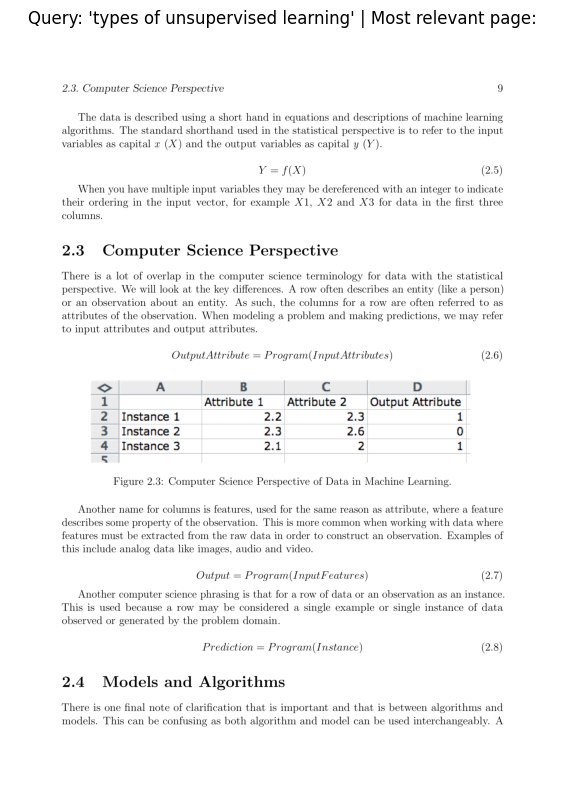

In [45]:
doc = fitz.open(book_name)
page = doc.load_page(5 + 12) # number of page (our doc starts page numbers on page 41)

# Get the image of the page
img = page.get_pixmap(dpi=300)

# Optional: save the image
#img.save("output_filename.png")
doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') # Turn off axis
plt.show()

In [46]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    # Get Euclidean/L2 norm of each vector (removes the magnitude, keeps direction)
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))

    return dot_product / (norm_vector1 * norm_vector2)

# Example tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Calculate cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [47]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Takes a query, retrieves most relevant resources and prints them out in descending order.

    Note: Requires pages_and_chunks to be formatted in a specific way (see above for reference).
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    print(f"Query: {query}\n")
    print("Results:")
    # Loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        # Print the page number too so we can reference the textbook further and check the results
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [48]:
query = "symptoms of pellagra"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 317 embeddings: 0.00008 seconds.


(tensor([0.1065, 0.0373, 0.0361, 0.0312, 0.0240], device='cuda:0'),
 tensor([163, 182, 185,  48,  12], device='cuda:0'))

In [49]:
print_top_results_and_scores(query=query,embeddings=embeddings)

[INFO] Time taken to get scores on 317 embeddings: 0.00010 seconds.
Query: symptoms of pellagra

Results:
Score: 0.1065
16.5. Summary 71 5.032652964 14.50877492 -121.5360148 0 4.083972925 8.841949563
-144.4144814 0 4.875524106 13.57018471 -125.3253507 0 4.732801047 12.7176458
-128.7672748 0 5.385993407 16.61941128 -113.0148198 0 20.74393514 108.3582168
257.3589021 1 21.41752855 112.3818455 273.603351 1 20.57924186 107.3744415
253.3871419 1 20.7386947 108.3269137 257.2325231 1 19.44605384 100.60548
226.0590616 1 18.36360265 94.1395889 199.954556 1 19.90363232 103.3387697
237.0940718 1 19.10870851 98.59038855 217.9236065 1 18.18787593 93.08990662
195.7167121 1 19.71767611 102.2279828 232.6095325 1 19.09629027 98.5162097
217.6241269 1 20.52741312 107.0648488 252.1372346 1 20.63205608 107.6899208
254.6608151 1 19.86218119 103.0911664 236.0944321 1 21.34670569 111.9587938
271.8953795 1 20.333906 105.9089574 247.4705967 1 21.02714855 110.0499579
264.1889062 1 18.27536089 93.61248743 197.8265

In [50]:
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [51]:
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [56]:
moded_id = "Gemma 2B in 4-bit precision"

In [53]:
!pip install bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 21.6 MB/s eta 0:00:00


In [54]:
!pip install flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.5 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.5.7-cp310-cp310-linux_x86_64.whl size=120853563 sha256=bbe6f77fd0899f8a125a5bdcf734b660c4c88e81c9b51c7ce98ebeba44dc6fa0
  Stored in directory: /root/.cache/pip/wheels/13/96/ed/bcac89c56b606421f99b45b16a94db5d0f2b6b4eaf8bac4d01
Successfully built flash-attn


In [57]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available


from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

#Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

#Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation=attn_implementation) # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2b-it


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/google/gemma-2b-it.
401 Client Error. (Request ID: Root=1-66153e4a-1dc3d52a2cb90879387c87f3;97d4f365-6d62-443c-ad51-defd4fba9be2)

Cannot access gated repo for url https://huggingface.co/google/gemma-2b-it/resolve/main/config.json.
Repo model google/gemma-2b-it is gated. You must be authenticated to access it.